In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
def display_one_image_per_folder(folder_path):
    # List all subdirectories in the given folder
    subfolders = [subfolder for subfolder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, subfolder))]
    
    # Iterate through each subfolder
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)+'\images'
        
        # List all files in the subfolder
        files = os.listdir(subfolder_path)
       
        # Find the first image in the subfolder
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.gif')):
                img_path = os.path.join(subfolder_path, file)
                
                # Load and display the image
                img = mpimg.imread(img_path)
                # img = img[:64, :64]
                plt.imshow(img)
                plt.axis('off')  # Hide axis
                plt.title(subfolder)  # Set title as subfolder name
                plt.show()
                break  # Move to the next subfolder

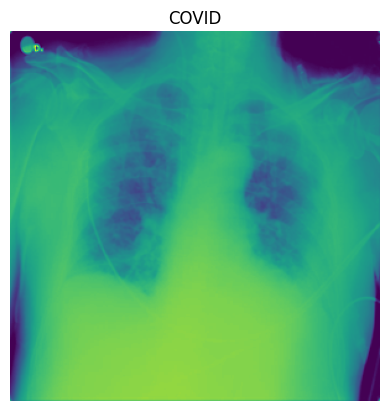

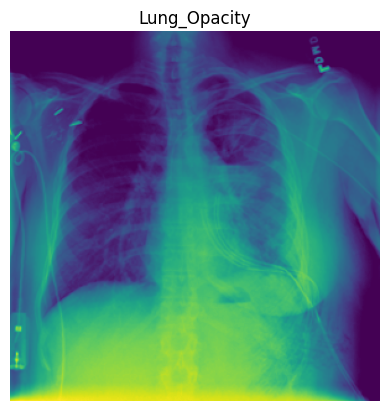

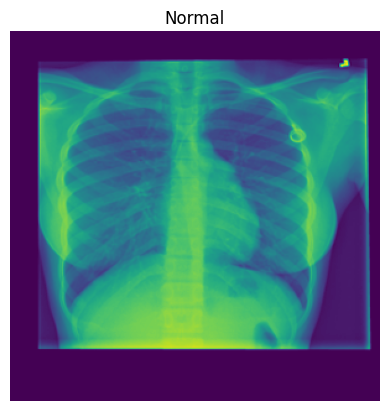

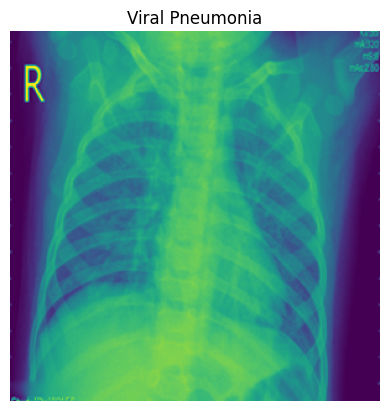

In [3]:
# Specify the path to the folder containing the subfolders with images
folder_path = "D:\COVID-19_Radiography_Dataset"

# Call the function to display images
display_one_image_per_folder(folder_path)

In [4]:
# Define the main folder containing subfolders with images
main_folder_path = "D:\COVID-19_Radiography_Dataset"

# Define the dimensions of the input images
image_size = (64, 64)
batch_size = 32

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create train and validation generators
train_generator = datagen.flow_from_directory(
    main_folder_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    main_folder_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check the number of classes
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)


Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.
Number of classes: 4


In [5]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with num_classes units and softmax activation
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
530/530 [==============================] - 149s 280ms/step - loss: 0.5585 - accuracy: 0.7837 - val_loss: 0.4571 - val_accuracy: 0.8329
Epoch 2/10
530/530 [==============================] - 29s 55ms/step - loss: 0.4744 - accuracy: 0.8198 - val_loss: 0.3979 - val_accuracy: 0.8549
Epoch 3/10
530/530 [==============================] - 29s 55ms/step - loss: 0.4096 - accuracy: 0.8468 - val_loss: 0.4122 - val_accuracy: 0.8500
Epoch 4/10
530/530 [==============================] - 29s 55ms/step - loss: 0.3653 - accuracy: 0.8634 - val_loss: 0.3774 - val_accuracy: 0.8599
Epoch 5/10
530/530 [==============================] - 29s 56ms/step - loss: 0.3238 - accuracy: 0.8776 - val_loss: 0.3484 - val_accuracy: 0.8674
Epoch 6/10
530/530 [==============================] - 29s 55ms/step - loss: 0.2859 - accuracy: 0.8940 - val_loss: 0.3848 - val_accuracy: 0.8637
Epoch 7/10
530/530 [==============================] - 29s 55ms/step - loss: 0.2580 - accuracy: 0.9042 - val_loss: 0.3535 - val_accurac

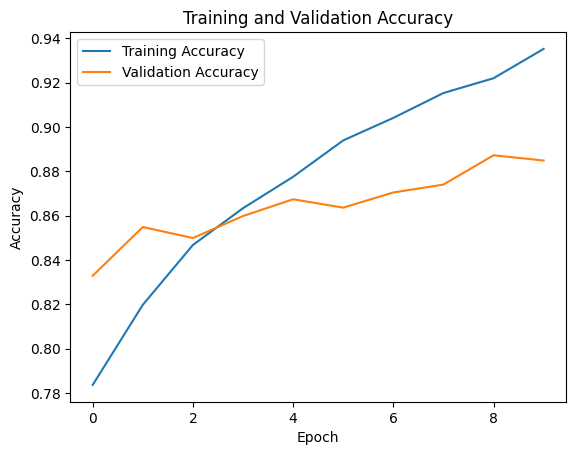

In [9]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [13]:
history.model.save("model.h5")

In [24]:
# Load the trained model
model = load_model('model.h5')

# Function to preprocess and predict on the uploaded image
def predict_image(img_path):
    # Preprocess the image
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    
    # Perform prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    
    return predicted_class

In [26]:
predict_image(r"D:\COVID-19_Radiography_Dataset\Normal\images\Normal-645.png")

1/1 [==============================] - 0s 56ms/step


2